# Human Activity Recognition Using Smartphones

**HERE WE LOOK AT THE RAW DATA, BEFORE ANY PREPROCESSING LIKE NORMALIZATION OR SPLITTING INTO SETS!**



Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.


| Key                 | Value                     |
|---------------------|---------------------------|
| Dataset Characteristics | Multivariate, Time-Series |
| Subject Area        | Copmuter Science          |
| Associated Tasks    | Classification, Clustering    |
| Feature Type        | -                      |
| Instances           | 10299                   |
| Features            | -                         |


https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno

from src.data.data import load_data

path_X = "../data/UCI HAR Dataset/train/X_train.txt"
path_y = "../data/UCI HAR Dataset/train/y_train.txt"
fig_path = "../reports/figures/"

# reload packages
%load_ext autoreload
%autoreload 2

# Load the Data


In [2]:
df_X, df_y = load_data(path_X, path_y, normalize=True)

print("Train_X:"); 
df_X.info()
print("Missing values:", df_X.isna().sum().sum())
print("\n\nTrain_y")
df_y.info()
print("Missing values:", df_y.isna().sum().sum())

Train_X:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB
Missing values: 0


Train_y
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       7352 non-null   int64
dtypes: int64(1)
memory usage: 57.6 KB
Missing values: 0


# Visualize Data

Let us have a look at the distribution over all variables, we look at the histograms.

What we see is that we have a lot of different distributions. Some are symmetric, but many are unsymmetric.

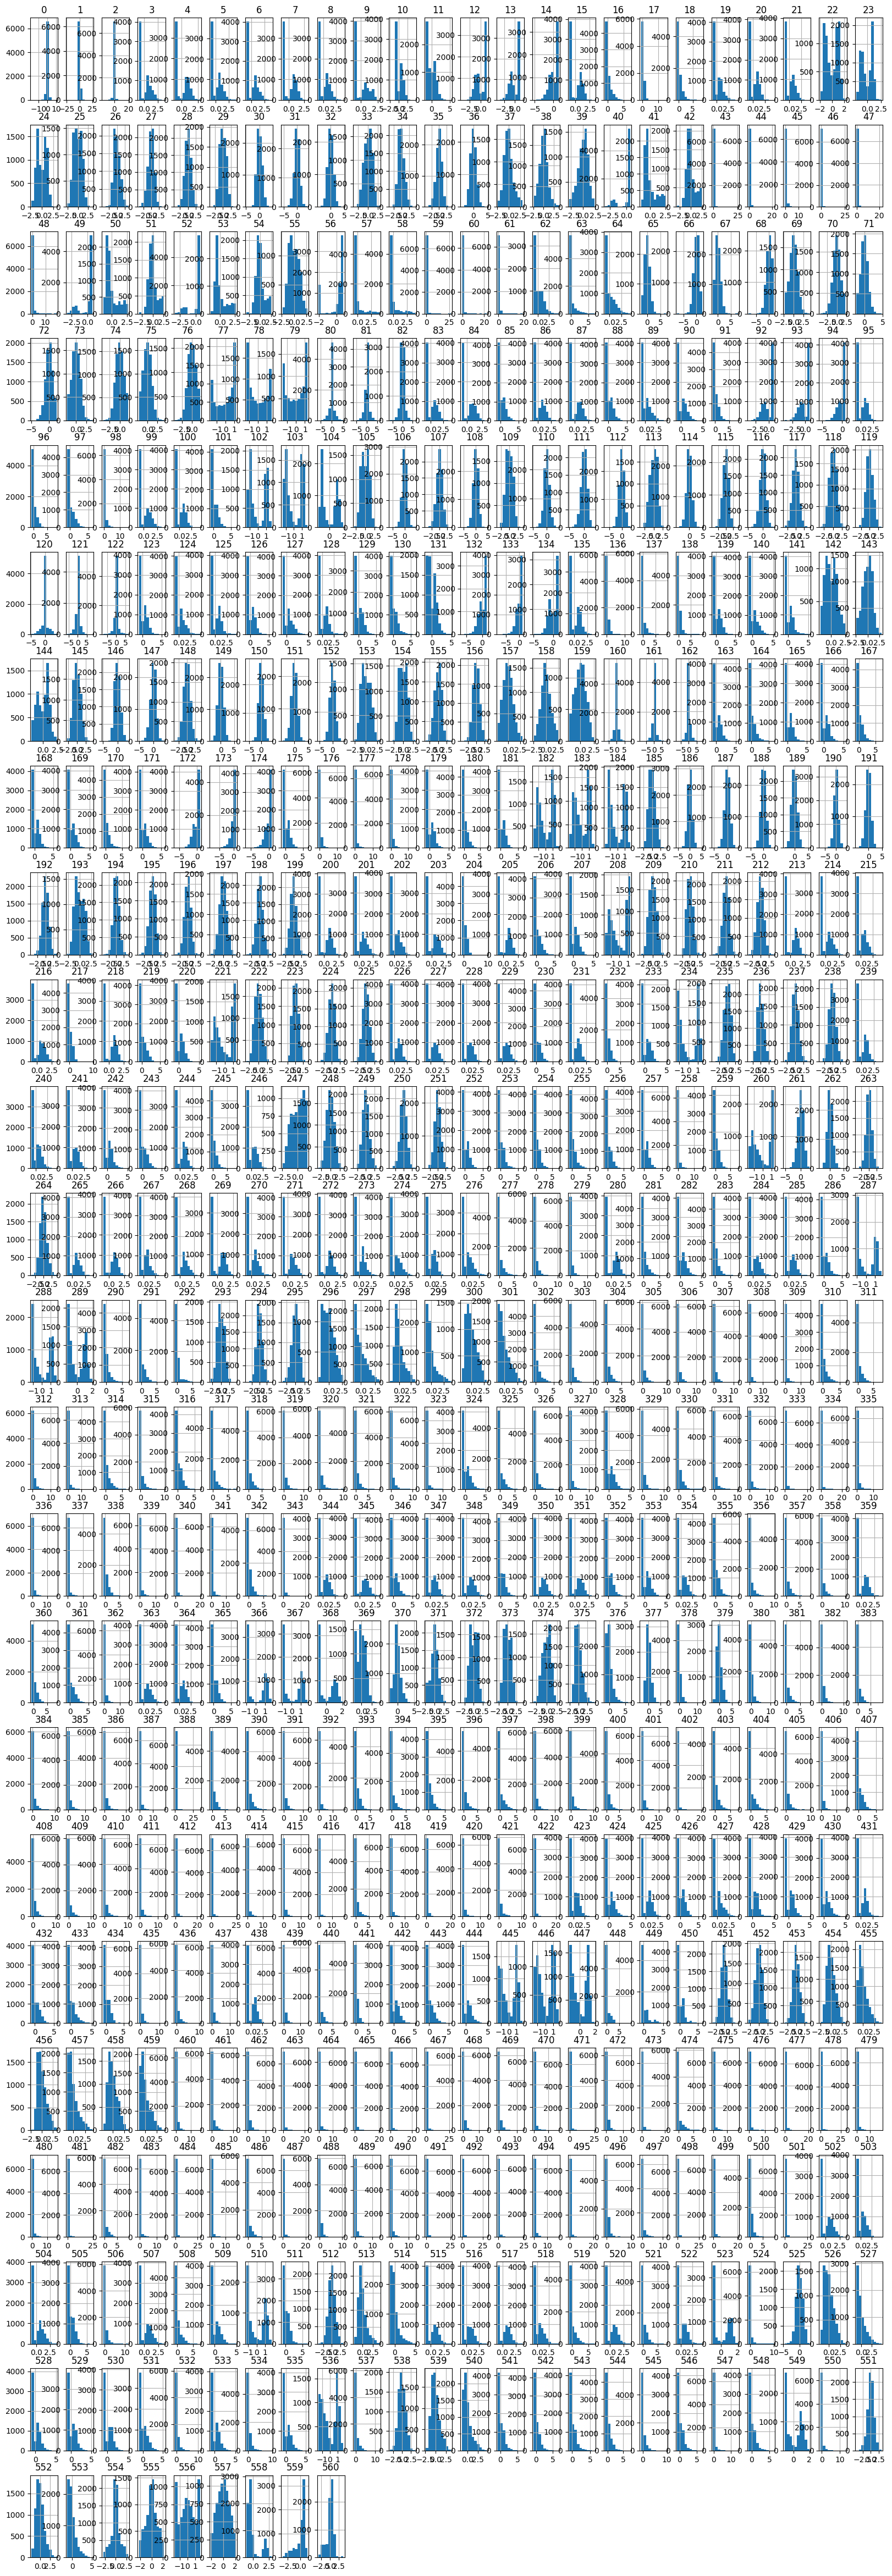

In [5]:
axs = df_X.hist(figsize=(20, 60))

### Visualize the correlation between variables

1) Spearman Correlation (Rank correlation coefficient)  
   It assesses how well the relationship between two variables can be described using a monotonic function. 

We see many blocks that belong together. What does this indicate?

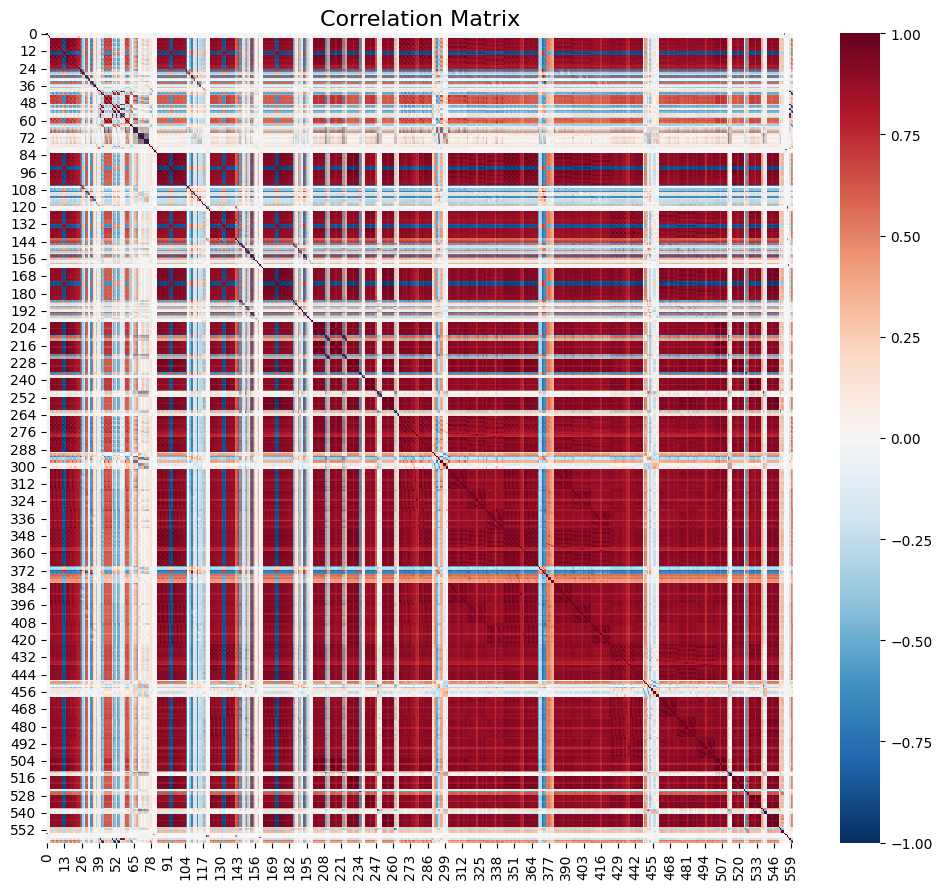

In [36]:
from src.data.data import create_corr_plot

save_path = f"{fig_path}spearman_correlation_matrix.png"
create_corr_plot(df_X, save_path=save_path)

2) Another correlation algorithm that is not good only for Normally distributed variables.



### Feature expressiveness

How much information does each feature hold?
We can assess this information by using PCA/SVD and we can also look at it by using Diffusion Maps (https://datafold-dev.gitlab.io/datafold/)


#### PCA

Principle Component Analysis for time series has limited information. This is due to the nature of PCA viewing each time point as iid, meaning that it does not take into account previous or future time points, which in theory convey further information about the current time step that is analyzed.

With $p$ being a threshold for the cumulative explained variance we see, that we could discard many features without losing too much of information:
```
p=0.9 at index 62
p=0.95 at index 101
p=0.99 at index 178
```

p=0.6 at index 2
p=0.7 at index 9
p=0.8 at index 25
p=0.9 at index 62
p=0.95 at index 101
p=0.99 at index 178


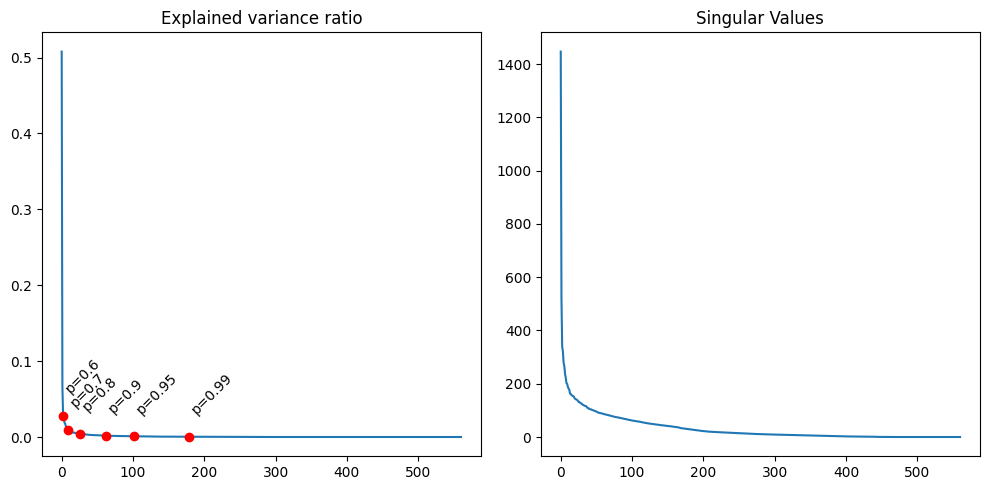

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(df_X.values)
fig = plt.figure(figsize=(10,5))
fig.add_subplot(121)
plt.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title('Explained variance ratio')

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# Points where p equals the values in the list [0.9, 0.95, 0.99]
thresholds = [0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
for threshold in thresholds:
    index = np.argmax(cumulative_explained_variance >= threshold)
    plt.scatter(index, pca.explained_variance_ratio_[index], color='red', zorder=5)
    plt.text(index, pca.explained_variance_ratio_[index] + 0.03, f'p={threshold}', rotation=45)
    print(f'p={threshold} at index {index}')

fig.add_subplot(122)
plt.plot(np.arange(len(pca.singular_values_)), pca.singular_values_)
_ = plt.title('Singular Values')
plt.tight_layout()
plt.savefig(f"{fig_path}pca.png", dpi=200, bbox_inches='tight')

In [34]:
from src.data.data import pca_on_data, create_corr_plot

X_new = pca_on_data(df_X, n_components=561)

Performed PCA. 
Kept an Explained variance ratio of : 100.00% 
Number of components: 561 / 561
